<a href="https://colab.research.google.com/github/mcova100-jpg/Machine_Learning/blob/main/Session2_v1_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 2



*   Regularization
*   Boosting
* Bagging
* XGBoost example



---



Version 1.5

Michael de la Maza

AI/ML

Hult International business School




# Regularization

### Part 1: max_depth

In [1]:
# import and load data set

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Wine dataset
# https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data
wine = load_wine()
print(wine.DESCR)



.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [ ]:
# Split into training and testing set.
# Testing set is 20% of instances
X = wine.data # provided by scikit
y = wine.target # provided by scikit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train decision tree with all hyperparameters set to default
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.94


In [ ]:
# Depth of tree
print(dtc.get_depth())

4


[Text(0.5, 0.9, 'color_intensity <= 3.82\ngini = 0.659\nsamples = 142\nvalue = [45, 57, 40]'),
 Text(0.3, 0.7, 'proline <= 1002.5\ngini = 0.109\nsamples = 52\nvalue = [3, 49, 0]'),
 Text(0.4, 0.8, 'True  '),
 Text(0.2, 0.5, 'ash <= 3.07\ngini = 0.039\nsamples = 50\nvalue = [1, 49, 0]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 49\nvalue = [0, 49, 0]'),
 Text(0.3, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.4, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.7, 0.7, 'flavanoids <= 1.4\ngini = 0.577\nsamples = 90\nvalue = [42, 8, 40]'),
 Text(0.6, 0.8, '  False'),
 Text(0.6, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [0, 0, 40]'),
 Text(0.8, 0.5, 'proline <= 724.5\ngini = 0.269\nsamples = 50\nvalue = [42, 8, 0]'),
 Text(0.7, 0.3, 'malic_acid <= 3.92\ngini = 0.198\nsamples = 9\nvalue = [1, 8, 0]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 8\nvalue = [0, 8, 0]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 41\nva

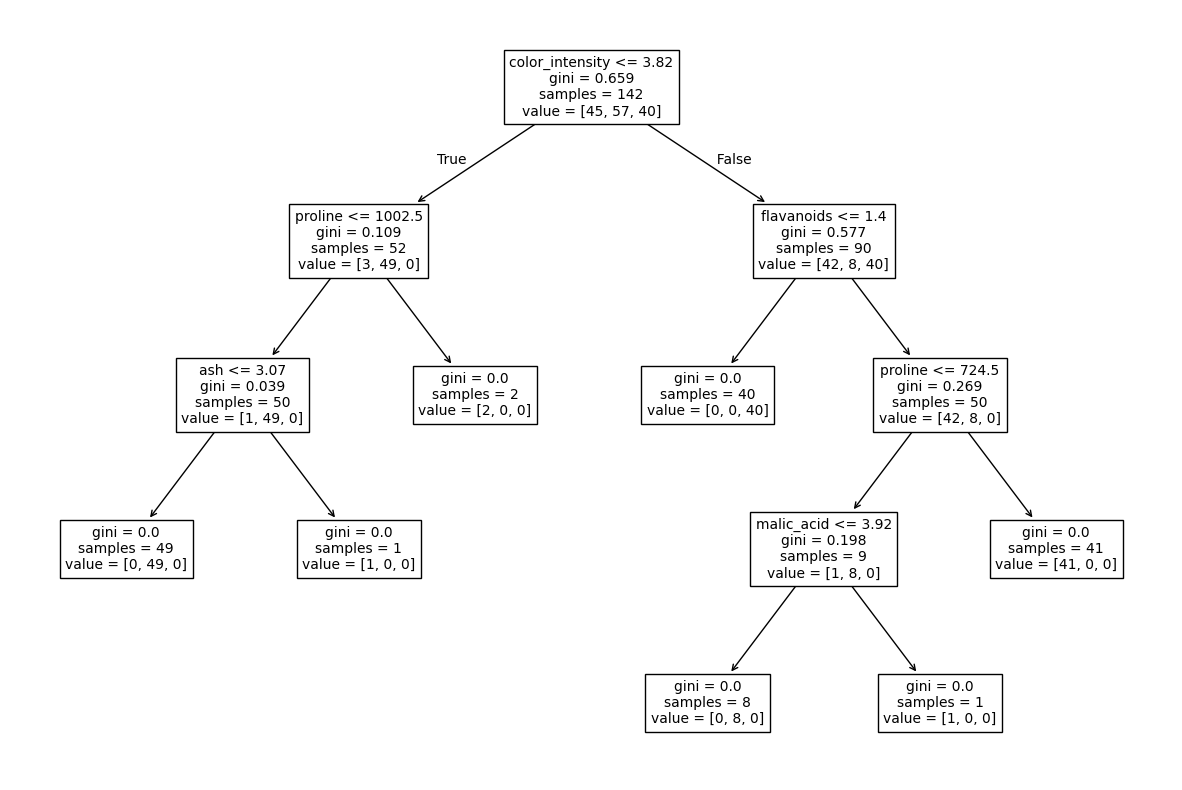

In [ ]:
# What does the tree look like?
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(dtc, feature_names = wine.feature_names, fontsize=10)

In [ ]:
# Try decision tree with a max_depth of 2
# max_depth is a regularization hyperparameter

dtc2 = DecisionTreeClassifier(max_depth=2)

dtc2.fit(X_train, y_train)

y_train_pred = dtc2.predict(X_train)
y_test_pred = dtc2.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print('Decison tree maxdepth=2. Accuracy - training set', round(accuracy_train, 2))
print('Decision tree maxdepth=2. Accuracy - testing set', round(accuracy_test, 2))

Decison tree maxdepth=2. Accuracy - training set 0.94
Decision tree maxdepth=2. Accuracy - testing set 0.86


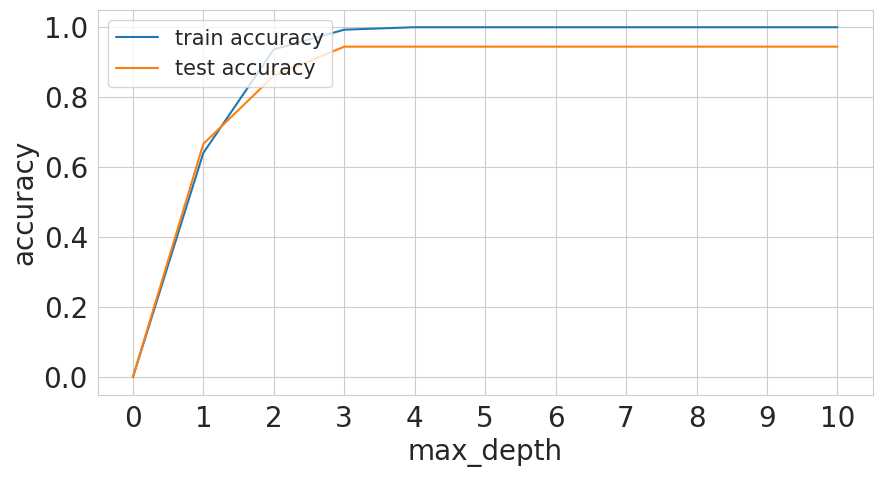

In [ ]:
# Search over max_depth from 1 to 10 to find the best performing decision tree

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

accuracy_train_list = [0]
accuracy_test_list = [0]

for depth in range(1, 11):
  dtc = DecisionTreeClassifier(max_depth=depth)
  dtc.fit(X_train, y_train)

  y_train_pred = dtc.predict(X_train)
  y_test_pred = dtc.predict(X_test)

  accuracy_train = accuracy_score(y_train, y_train_pred)
  accuracy_test = accuracy_score(y_test, y_test_pred)

  accuracy_train_list.append(accuracy_train)
  accuracy_test_list.append(accuracy_test)



matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.plot(accuracy_train_list, label="train accuracy")
plt.plot(accuracy_test_list, label="test accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 11, 1))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

# Observe: We do not get overfitting! Test accuracy never declines.
# That is because decision tree stops growing because it perfectly classifies the dataset at depth=4

In [ ]:
# Try decision tree with a max_depth of 3 since this is best performance with smallest tree
# max_depth is a regularization hyperparameter

dtc3 = DecisionTreeClassifier(max_depth=3)

dtc3.fit(X_train, y_train)

y_train_pred = dtc3.predict(X_train)
y_test_pred = dtc3.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print('Decison tree maxdepth=3. Accuracy - training set', round(accuracy_train, 2))
print('Decision tree maxdepth=3. Accuracy - testing set', round(accuracy_test, 2))

Decison tree maxdepth=3. Accuracy - training set 0.99
Decision tree maxdepth=3. Accuracy - testing set 0.94


[Text(0.5, 0.875, 'color_intensity <= 3.82\ngini = 0.659\nsamples = 142\nvalue = [45, 57, 40]'),
 Text(0.3, 0.625, 'proline <= 1002.5\ngini = 0.109\nsamples = 52\nvalue = [3, 49, 0]'),
 Text(0.4, 0.75, 'True  '),
 Text(0.2, 0.375, 'ash <= 3.07\ngini = 0.039\nsamples = 50\nvalue = [1, 49, 0]'),
 Text(0.1, 0.125, 'gini = 0.0\nsamples = 49\nvalue = [0, 49, 0]'),
 Text(0.3, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.4, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.7, 0.625, 'flavanoids <= 1.4\ngini = 0.577\nsamples = 90\nvalue = [42, 8, 40]'),
 Text(0.6, 0.75, '  False'),
 Text(0.6, 0.375, 'gini = 0.0\nsamples = 40\nvalue = [0, 0, 40]'),
 Text(0.8, 0.375, 'proline <= 724.5\ngini = 0.269\nsamples = 50\nvalue = [42, 8, 0]'),
 Text(0.7, 0.125, 'gini = 0.198\nsamples = 9\nvalue = [1, 8, 0]'),
 Text(0.9, 0.125, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]')]

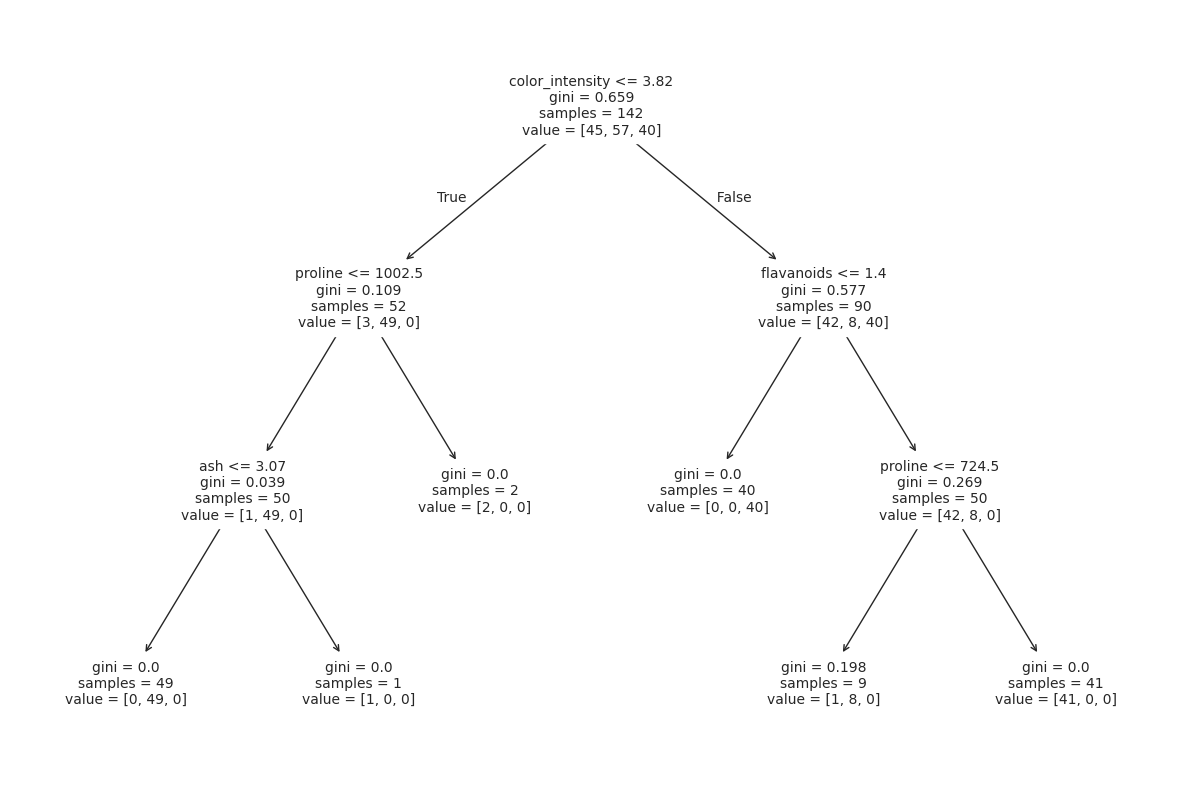

In [ ]:
# What does the tree look like?


plt.figure(figsize=(15, 10))
plot_tree(dtc3, feature_names = wine.feature_names, fontsize=10)

# Question: Why was the original tree depth 4?

### Part 2: Setting a minimum number of examples at the leaf nodes

The minimum number of examples at a leaf node will be at least 10% of the data set.

In [ ]:
# Look at documentation
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

# each leaf node must cover at least 10% of the instances
dtc_mfl10 = DecisionTreeClassifier(min_weight_fraction_leaf = 0.1, random_state=42)

dtc_mfl10.fit(X_train, y_train)

y_train_pred = dtc_mfl10.predict(X_train)
y_test_pred = dtc_mfl10.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print('Decison tree min_leaf=10%. Accuracy - training set', round(accuracy_train, 2))
print('Decision tree min_leaf=10%. Accuracy - testing set', round(accuracy_test, 2))
print (dtc_mfl10.get_depth())

Decison tree min_leaf=10%. Accuracy - training set 0.93
Decision tree min_leaf=10%. Accuracy - testing set 0.94
3


[Text(0.4444444444444444, 0.875, 'color_intensity <= 3.82\ngini = 0.659\nsamples = 142\nvalue = [45, 57, 40]'),
 Text(0.2222222222222222, 0.625, 'alcohol <= 12.49\ngini = 0.109\nsamples = 52\nvalue = [3, 49, 0]'),
 Text(0.3333333333333333, 0.75, 'True  '),
 Text(0.1111111111111111, 0.375, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.32\nsamples = 15\nvalue = [3, 12, 0]'),
 Text(0.6666666666666666, 0.625, 'flavanoids <= 1.4\ngini = 0.577\nsamples = 90\nvalue = [42, 8, 40]'),
 Text(0.5555555555555556, 0.75, '  False'),
 Text(0.5555555555555556, 0.375, 'gini = 0.0\nsamples = 40\nvalue = [0, 0, 40]'),
 Text(0.7777777777777778, 0.375, 'alcohol <= 13.22\ngini = 0.269\nsamples = 50\nvalue = [42, 8, 0]'),
 Text(0.6666666666666666, 0.125, 'gini = 0.498\nsamples = 15\nvalue = [7, 8, 0]'),
 Text(0.8888888888888888, 0.125, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]')]

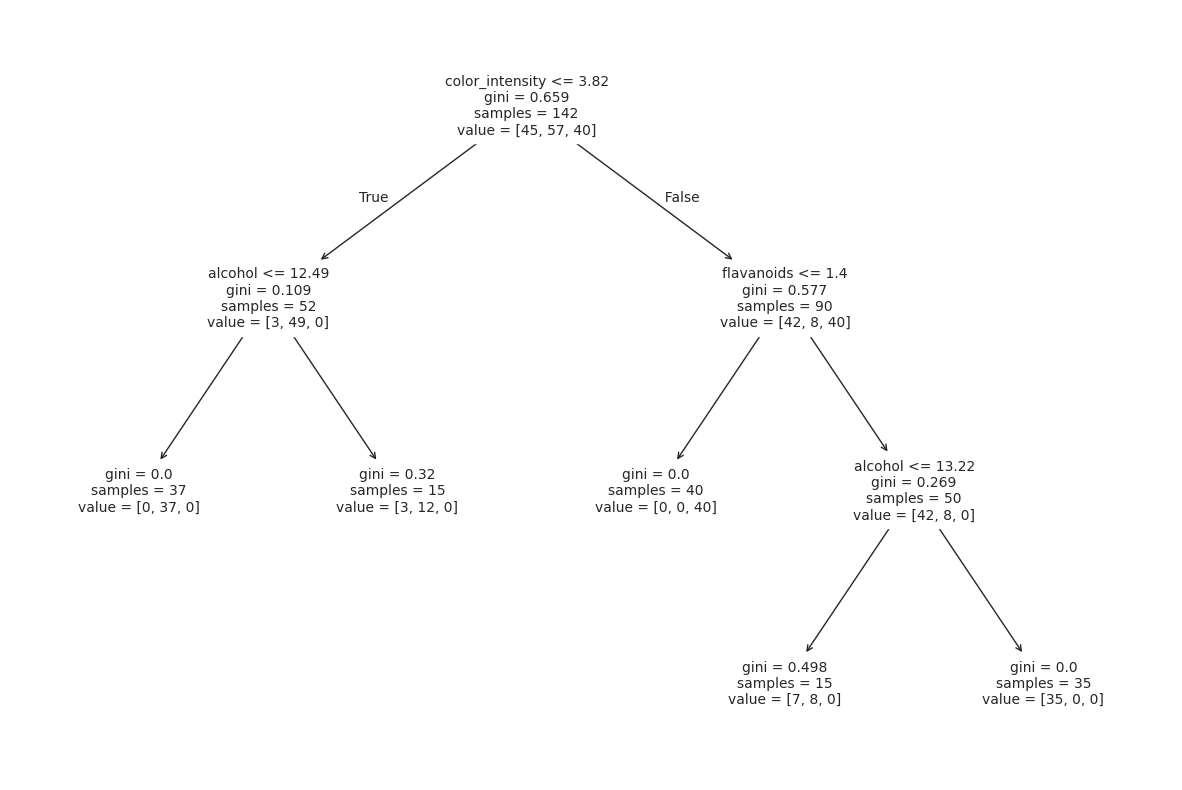

In [ ]:
plt.figure(figsize=(15, 10))
plot_tree(dtc_mfl10, feature_names = wine.feature_names, fontsize=10)

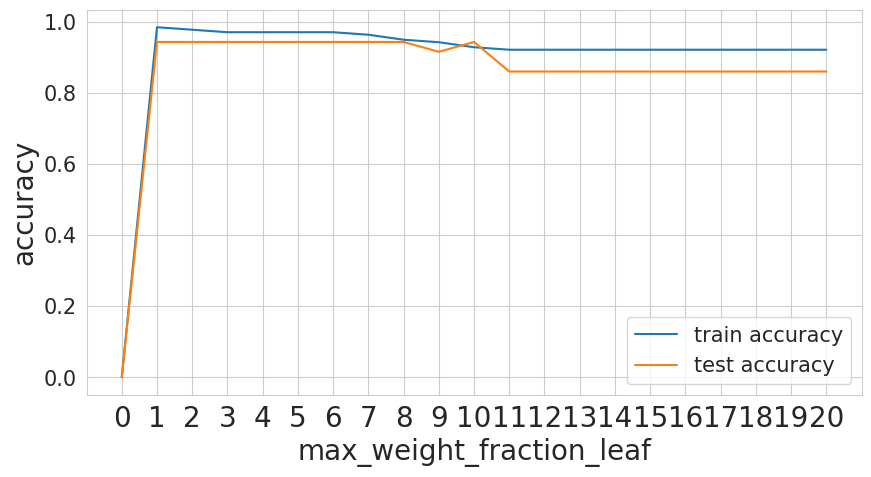

[0, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9166666666666666, 0.9444444444444444, 0.8611111111111112, 0.8611111111111112, 0.8611111111111112, 0.8611111111111112, 0.8611111111111112, 0.8611111111111112, 0.8611111111111112, 0.8611111111111112, 0.8611111111111112, 0.8611111111111112]


In [ ]:
# Search over min_weight_fraction_leaf from 1% to 20% to find the best performing decision tree

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

accuracy_train_list = [0]
accuracy_test_list = [0]

max_y = 20

for min_leaf in range(1, max_y+1):
  dtc = DecisionTreeClassifier(min_weight_fraction_leaf = min_leaf/100, random_state=42)
  dtc.fit(X_train, y_train)

  y_train_pred = dtc.predict(X_train)
  y_test_pred = dtc.predict(X_test)

  accuracy_train = accuracy_score(y_train, y_train_pred)
  accuracy_test = accuracy_score(y_test, y_test_pred)

  accuracy_train_list.append(accuracy_train)
  accuracy_test_list.append(accuracy_test)



matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=15)

plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.plot(accuracy_train_list, label="train accuracy")
plt.plot(accuracy_test_list, label="test accuracy")
plt.legend(loc="lower right", prop={'size': 15})
plt.xticks(range(0, max_y+1, 1))
plt.xlabel("max_weight_fraction_leaf", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

# As expected, training accuracy declines
# What about testing accuracy?
print(accuracy_test_list)
# What is the best value for min_weight_fraction_leaf?

In [ ]:
# A good value for min_weight_fraction_leaf is .06 to .08
# Want it to be as large as possible to create 'small' tree
# Do not want it to be too close to decline of test accuracy which starts at 0.09

dtc_mfl07 = DecisionTreeClassifier(min_weight_fraction_leaf = 0.07, random_state=42)

dtc_mfl07.fit(X_train, y_train)

y_train_pred = dtc_mfl07.predict(X_train)
y_test_pred = dtc_mfl07.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print('Decison tree min_leaf=10%. Accuracy - training set', round(accuracy_train, 2))
print('Decision tree min_leaf=10%. Accuracy - testing set', round(accuracy_test, 2))
print (dtc_mfl07.get_depth())

Decison tree min_leaf=10%. Accuracy - training set 0.96
Decision tree min_leaf=10%. Accuracy - testing set 0.94
3


[Text(0.4444444444444444, 0.875, 'color_intensity <= 3.82\ngini = 0.659\nsamples = 142\nvalue = [45, 57, 40]'),
 Text(0.2222222222222222, 0.625, 'proline <= 714.0\ngini = 0.109\nsamples = 52\nvalue = [3, 49, 0]'),
 Text(0.3333333333333333, 0.75, 'True  '),
 Text(0.1111111111111111, 0.375, 'gini = 0.0\nsamples = 42\nvalue = [0, 42, 0]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.42\nsamples = 10\nvalue = [3, 7, 0]'),
 Text(0.6666666666666666, 0.625, 'flavanoids <= 1.4\ngini = 0.577\nsamples = 90\nvalue = [42, 8, 40]'),
 Text(0.5555555555555556, 0.75, '  False'),
 Text(0.5555555555555556, 0.375, 'gini = 0.0\nsamples = 40\nvalue = [0, 0, 40]'),
 Text(0.7777777777777778, 0.375, 'proline <= 747.5\ngini = 0.269\nsamples = 50\nvalue = [42, 8, 0]'),
 Text(0.6666666666666666, 0.125, 'gini = 0.32\nsamples = 10\nvalue = [2, 8, 0]'),
 Text(0.8888888888888888, 0.125, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]')]

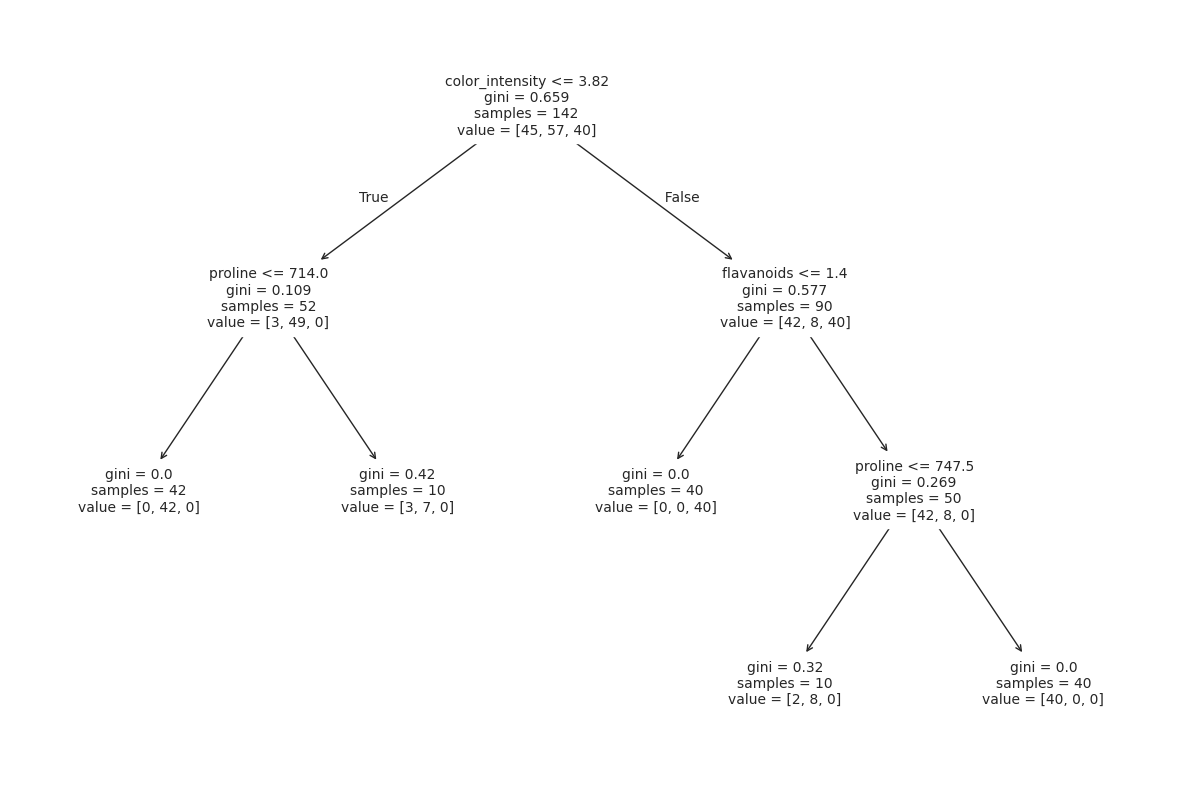

In [ ]:
# What does tree look like?

from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(dtc_mfl07, feature_names = wine.feature_names, fontsize=10)

# Compare to first tree. This tree is smaller and has same performance.
# Compare to second tree (max_depth = 3). This tree is smaller and more intuitive (greater number of samples at leaf) and has same performance.

### Part 3: Setting a minimum impurity decrease

Set minimum impurity decrease to 0.1

In [ ]:
# set min_impurity_decrease to 0.1

dtc_mid1 = DecisionTreeClassifier(min_impurity_decrease = 0.1, random_state=42)

dtc_mid1.fit(X_train, y_train)

y_train_pred = dtc_mid1.predict(X_train)
y_test_pred = dtc_mid1.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print('Decison tree min_impurity_decrease=0.1. Accuracy - training set', round(accuracy_train, 2))
print('Decision tree min_impurity_decrease=0.1. Accuracy - testing set', round(accuracy_test, 2))
print (dtc_mid1.get_depth())

Decison tree min_impurity_decrease=0.1. Accuracy - training set 0.92
Decision tree min_impurity_decrease=0.1. Accuracy - testing set 0.86
2


[Text(0.4, 0.8333333333333334, 'color_intensity <= 3.82\ngini = 0.659\nsamples = 142\nvalue = [45, 57, 40]'),
 Text(0.2, 0.5, 'gini = 0.109\nsamples = 52\nvalue = [3, 49, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'flavanoids <= 1.4\ngini = 0.577\nsamples = 90\nvalue = [42, 8, 40]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 40\nvalue = [0, 0, 40]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.269\nsamples = 50\nvalue = [42, 8, 0]')]

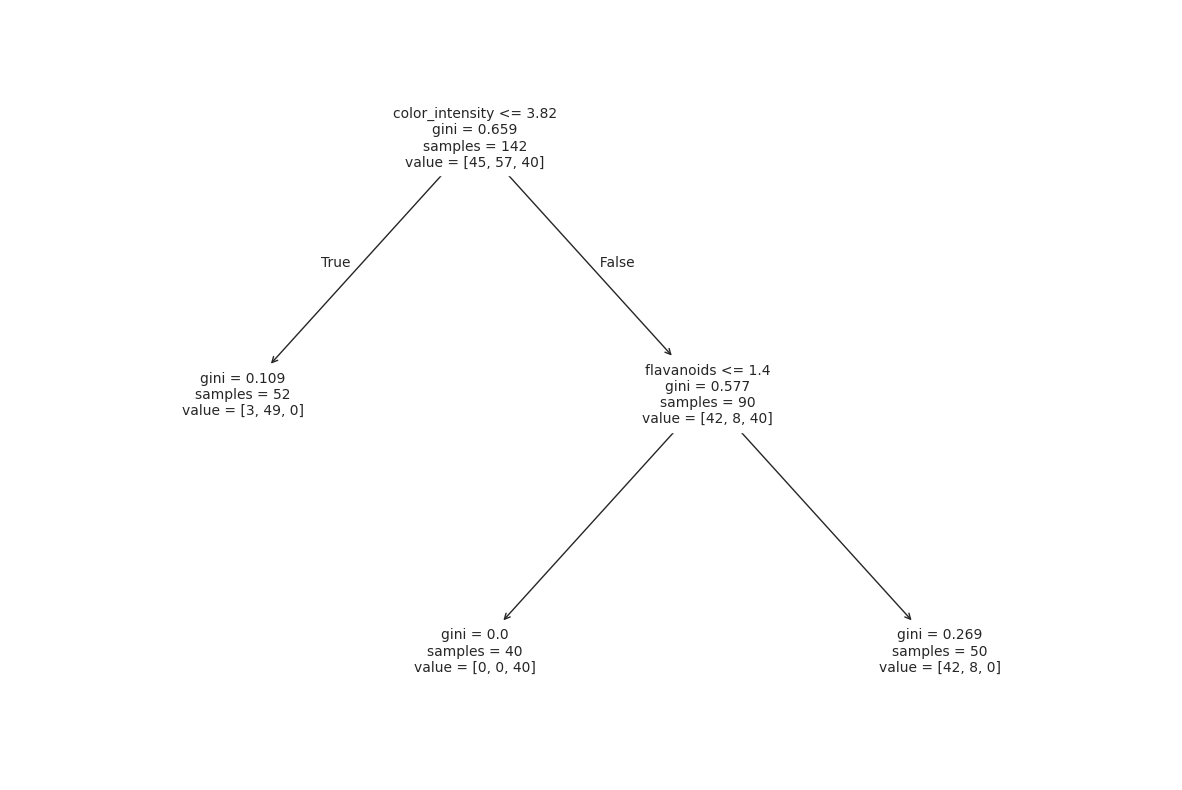

In [ ]:
# Examine decision tree
plt.figure(figsize=(15, 10))
plot_tree(dtc_mid1, feature_names = wine.feature_names, fontsize=10)

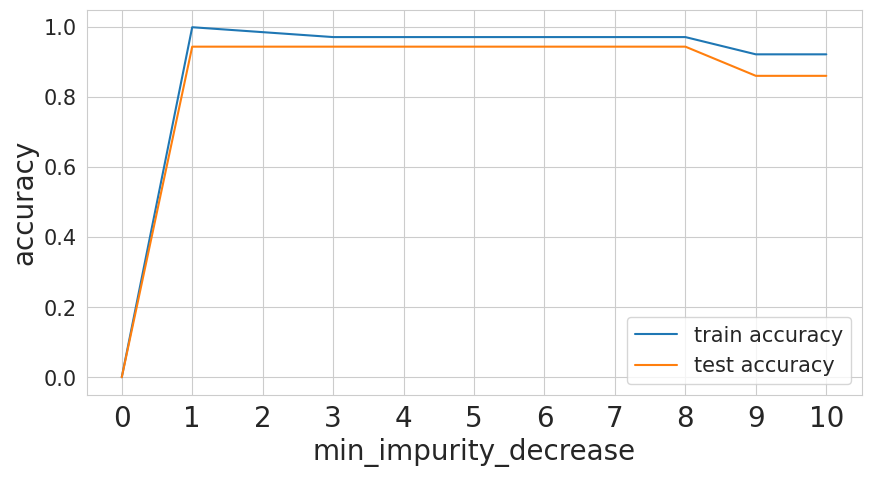

[0, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.8611111111111112, 0.8611111111111112]


In [ ]:
# Search over min_impurity_decrease from 0 to 0.1 to find the best performing decision tree

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

accuracy_train_list = [0]
accuracy_test_list = [0]

max_y = 10

for depth in range(1, max_y+1):
  dtc = DecisionTreeClassifier(min_impurity_decrease = depth/100, random_state=42)
  dtc.fit(X_train, y_train)

  y_train_pred = dtc.predict(X_train)
  y_test_pred = dtc.predict(X_test)

  accuracy_train = accuracy_score(y_train, y_train_pred)
  accuracy_test = accuracy_score(y_test, y_test_pred)

  accuracy_train_list.append(accuracy_train)
  accuracy_test_list.append(accuracy_test)



matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=15)

plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.plot(accuracy_train_list, label="train accuracy")
plt.plot(accuracy_test_list, label="test accuracy")
plt.legend(loc="lower right", prop={'size': 15})
plt.xticks(range(0, max_y+1, 1))
plt.xlabel("min_impurity_decrease", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

# As expected, training accuracy declines
# What about testing accuracy?
print(accuracy_test_list)
# What is the best value for min_impurity_decrease?

In [ ]:
# A good value for min_impurity_decrease is .06 to .08
# Want it to be as large as possible to create 'small' tree
# Do not want it to be too close to decline of test accuracy which starts at 0.09

dtc_mid07 = DecisionTreeClassifier(min_impurity_decrease = 0.07, random_state=42)

dtc_mid07.fit(X_train, y_train)

y_train_pred = dtc_mid07.predict(X_train)
y_test_pred = dtc_mid07.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print('Decison tree min_leaf=10%. Accuracy - training set', round(accuracy_train, 2))
print('Decision tree min_leaf=10%. Accuracy - testing set', round(accuracy_test, 2))
print (dtc_mid07.get_depth())

Decison tree min_leaf=10%. Accuracy - training set 0.97
Decision tree min_leaf=10%. Accuracy - testing set 0.94
3


[Text(0.3333333333333333, 0.875, 'color_intensity <= 3.82\ngini = 0.659\nsamples = 142\nvalue = [45, 57, 40]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.109\nsamples = 52\nvalue = [3, 49, 0]'),
 Text(0.25, 0.75, 'True  '),
 Text(0.5, 0.625, 'flavanoids <= 1.4\ngini = 0.577\nsamples = 90\nvalue = [42, 8, 40]'),
 Text(0.41666666666666663, 0.75, '  False'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 40\nvalue = [0, 0, 40]'),
 Text(0.6666666666666666, 0.375, 'proline <= 724.5\ngini = 0.269\nsamples = 50\nvalue = [42, 8, 0]'),
 Text(0.5, 0.125, 'gini = 0.198\nsamples = 9\nvalue = [1, 8, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]')]

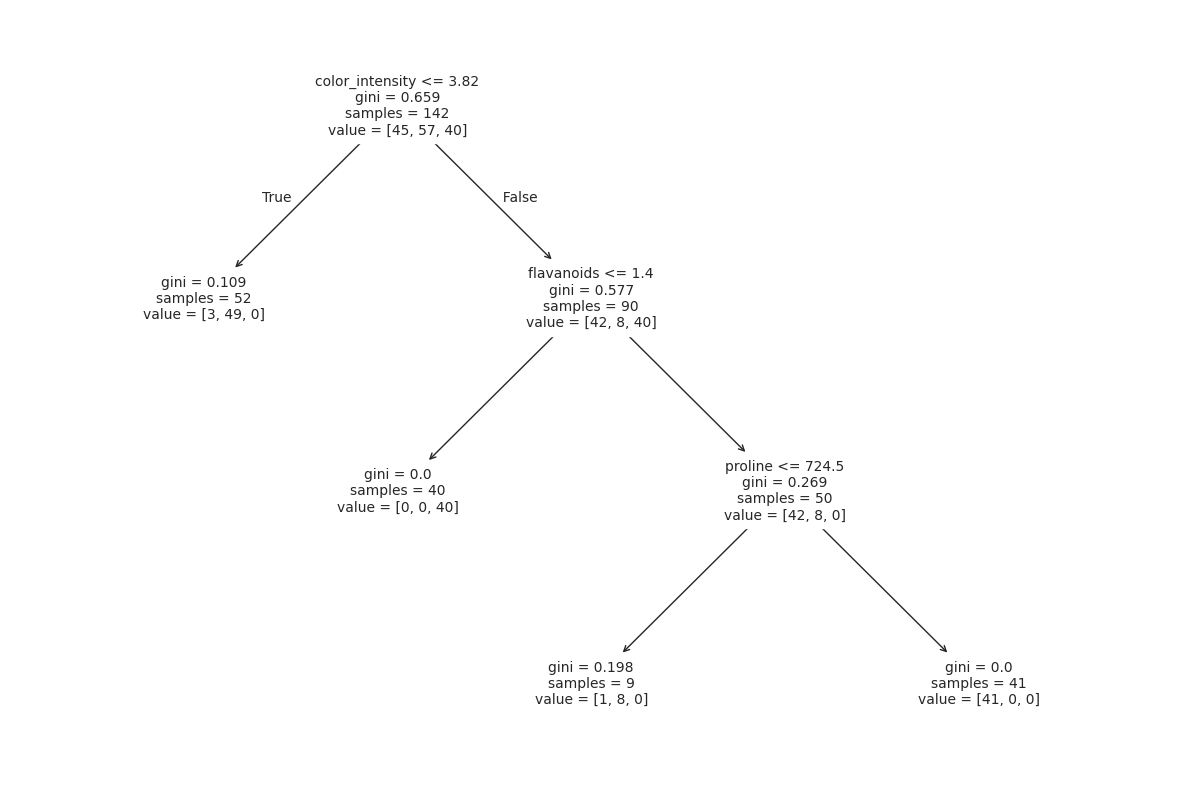

In [ ]:
# Examine decision tree
plt.figure(figsize=(15, 10))
plot_tree(dtc_mid07, feature_names = wine.feature_names, fontsize=10)

### Part 4: Create one tree with all hyperpameters set to optimal values

max_depth = 3

min_weight_fraction_leaf = 0.07

min_impurity_decrease = 0.07

In [ ]:
# One decision tree to rule them all
dtc_all = DecisionTreeClassifier(max_depth = 3,
                                 min_weight_fraction_leaf = 0.07,
                                 min_impurity_decrease = 0.07,
                                 random_state=42)

dtc_all.fit(X_train, y_train)

y_train_pred = dtc_all.predict(X_train)
y_test_pred = dtc_all.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print('Decison tree all optimizations. Accuracy - training set', round(accuracy_train, 2))
print('Decision tree all optimizations. Accuracy - testing set', round(accuracy_test, 2))
print (dtc_all.get_depth())

Decison tree all optimizations. Accuracy - training set 0.96
Decision tree all optimizations. Accuracy - testing set 0.94
3


[Text(0.3333333333333333, 0.875, 'color_intensity <= 3.82\ngini = 0.659\nsamples = 142\nvalue = [45, 57, 40]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.109\nsamples = 52\nvalue = [3, 49, 0]'),
 Text(0.25, 0.75, 'True  '),
 Text(0.5, 0.625, 'flavanoids <= 1.4\ngini = 0.577\nsamples = 90\nvalue = [42, 8, 40]'),
 Text(0.41666666666666663, 0.75, '  False'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 40\nvalue = [0, 0, 40]'),
 Text(0.6666666666666666, 0.375, 'proline <= 747.5\ngini = 0.269\nsamples = 50\nvalue = [42, 8, 0]'),
 Text(0.5, 0.125, 'gini = 0.32\nsamples = 10\nvalue = [2, 8, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]')]

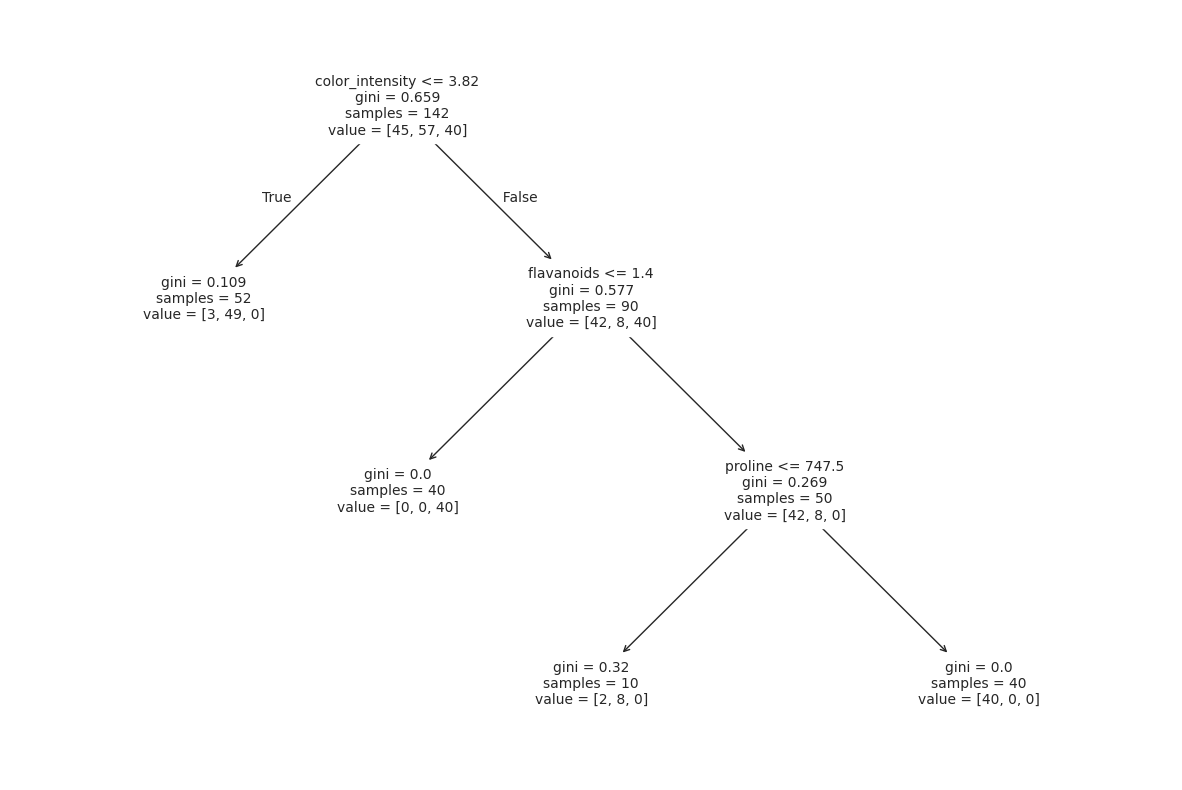

In [ ]:
# Examine decision tree
plt.figure(figsize=(15, 10))
plot_tree(dtc_all, feature_names = wine.feature_names, fontsize=10)

In [ ]:
# 5 minute exercise

# Select another regularization hyperparameter
# and train a decision tree with a specific value for that hyperparameter

# Examples:
# min_samples_split = 20
# min_samples_leaf = 10
# max_leaf_nodes = 6



In [ ]:
# 5 minute exercise

# Optimize the hyperparameter (e.g., check values between 1 and 10)




# Boosting

Use AdaBoost on wine dataset and compare to 'normal' decision trees.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier # Ada=Adaptive

dtc_ada = AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=1), n_estimators=5,
        learning_rate=0.5, random_state=42)

dtc_ada.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=5, random_state=42)

In [ ]:
y_train_pred = dtc_ada.predict(X_train)
y_test_pred = dtc_ada.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print('AdaBoost. Accuracy - training set', round(accuracy_train, 2))
print('AdaBoost. Accuracy - testing set', round(accuracy_test, 2))

# Compare performance to previous performance

AdaBoost. Accuracy - training set 0.93
AdaBoost. Accuracy - testing set 0.83


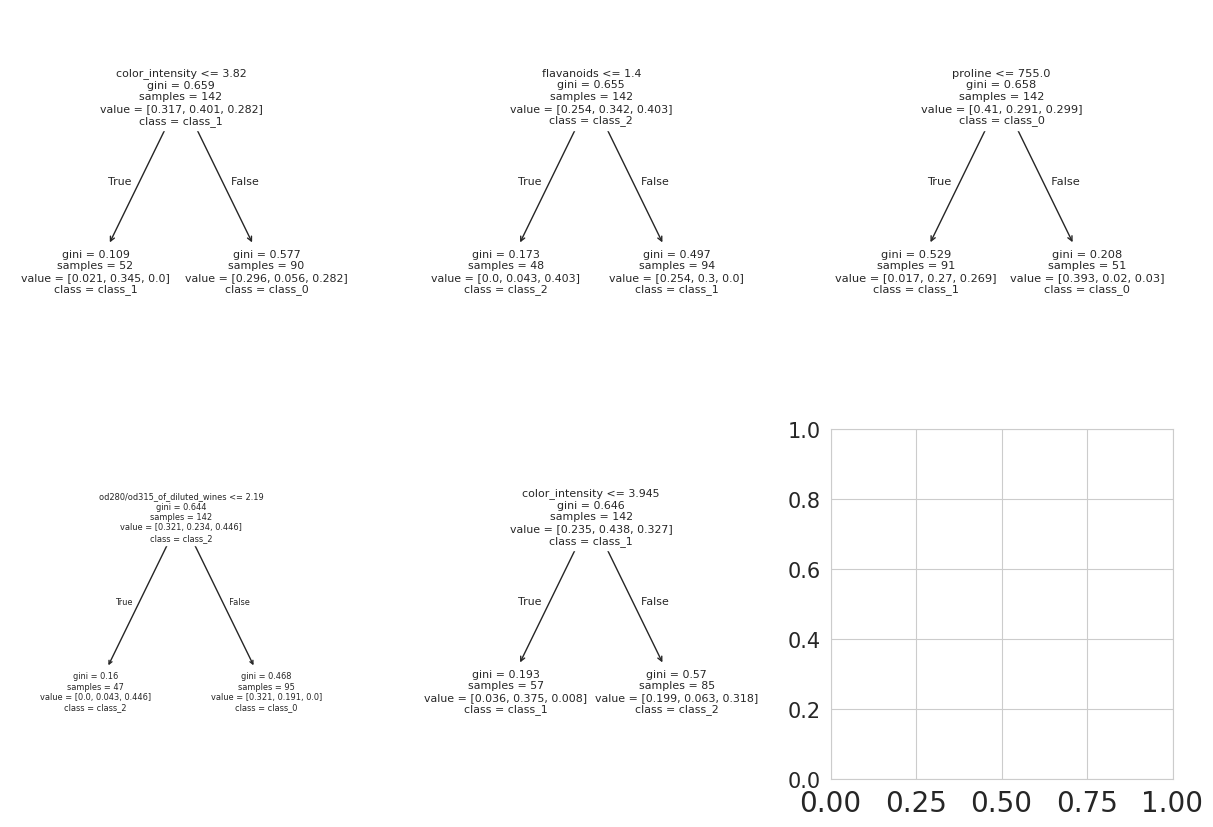

In [ ]:
# Examine decision tree
# This is a bit of a hack

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for ax, tree in zip(axes.flatten(), dtc_ada.estimators_):
    plot_tree(tree, feature_names=wine.feature_names, class_names=wine.target_names, ax=ax)

plt.show()

In [ ]:
# Try with max_depth = 2 trees

dtc_ada = AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=2), n_estimators=5,
        learning_rate=0.5, random_state=42)

dtc_ada.fit(X_train, y_train)

y_train_pred = dtc_ada.predict(X_train)
y_test_pred = dtc_ada.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print('AdaBoost maxdepth=2. Accuracy - training set', round(accuracy_train, 2))
print('AdaBoost maxdepth=2. Accuracy - testing set', round(accuracy_test, 2))

AdaBoost maxdepth=2. Accuracy - training set 1.0
AdaBoost maxdepth=2. Accuracy - testing set 0.92


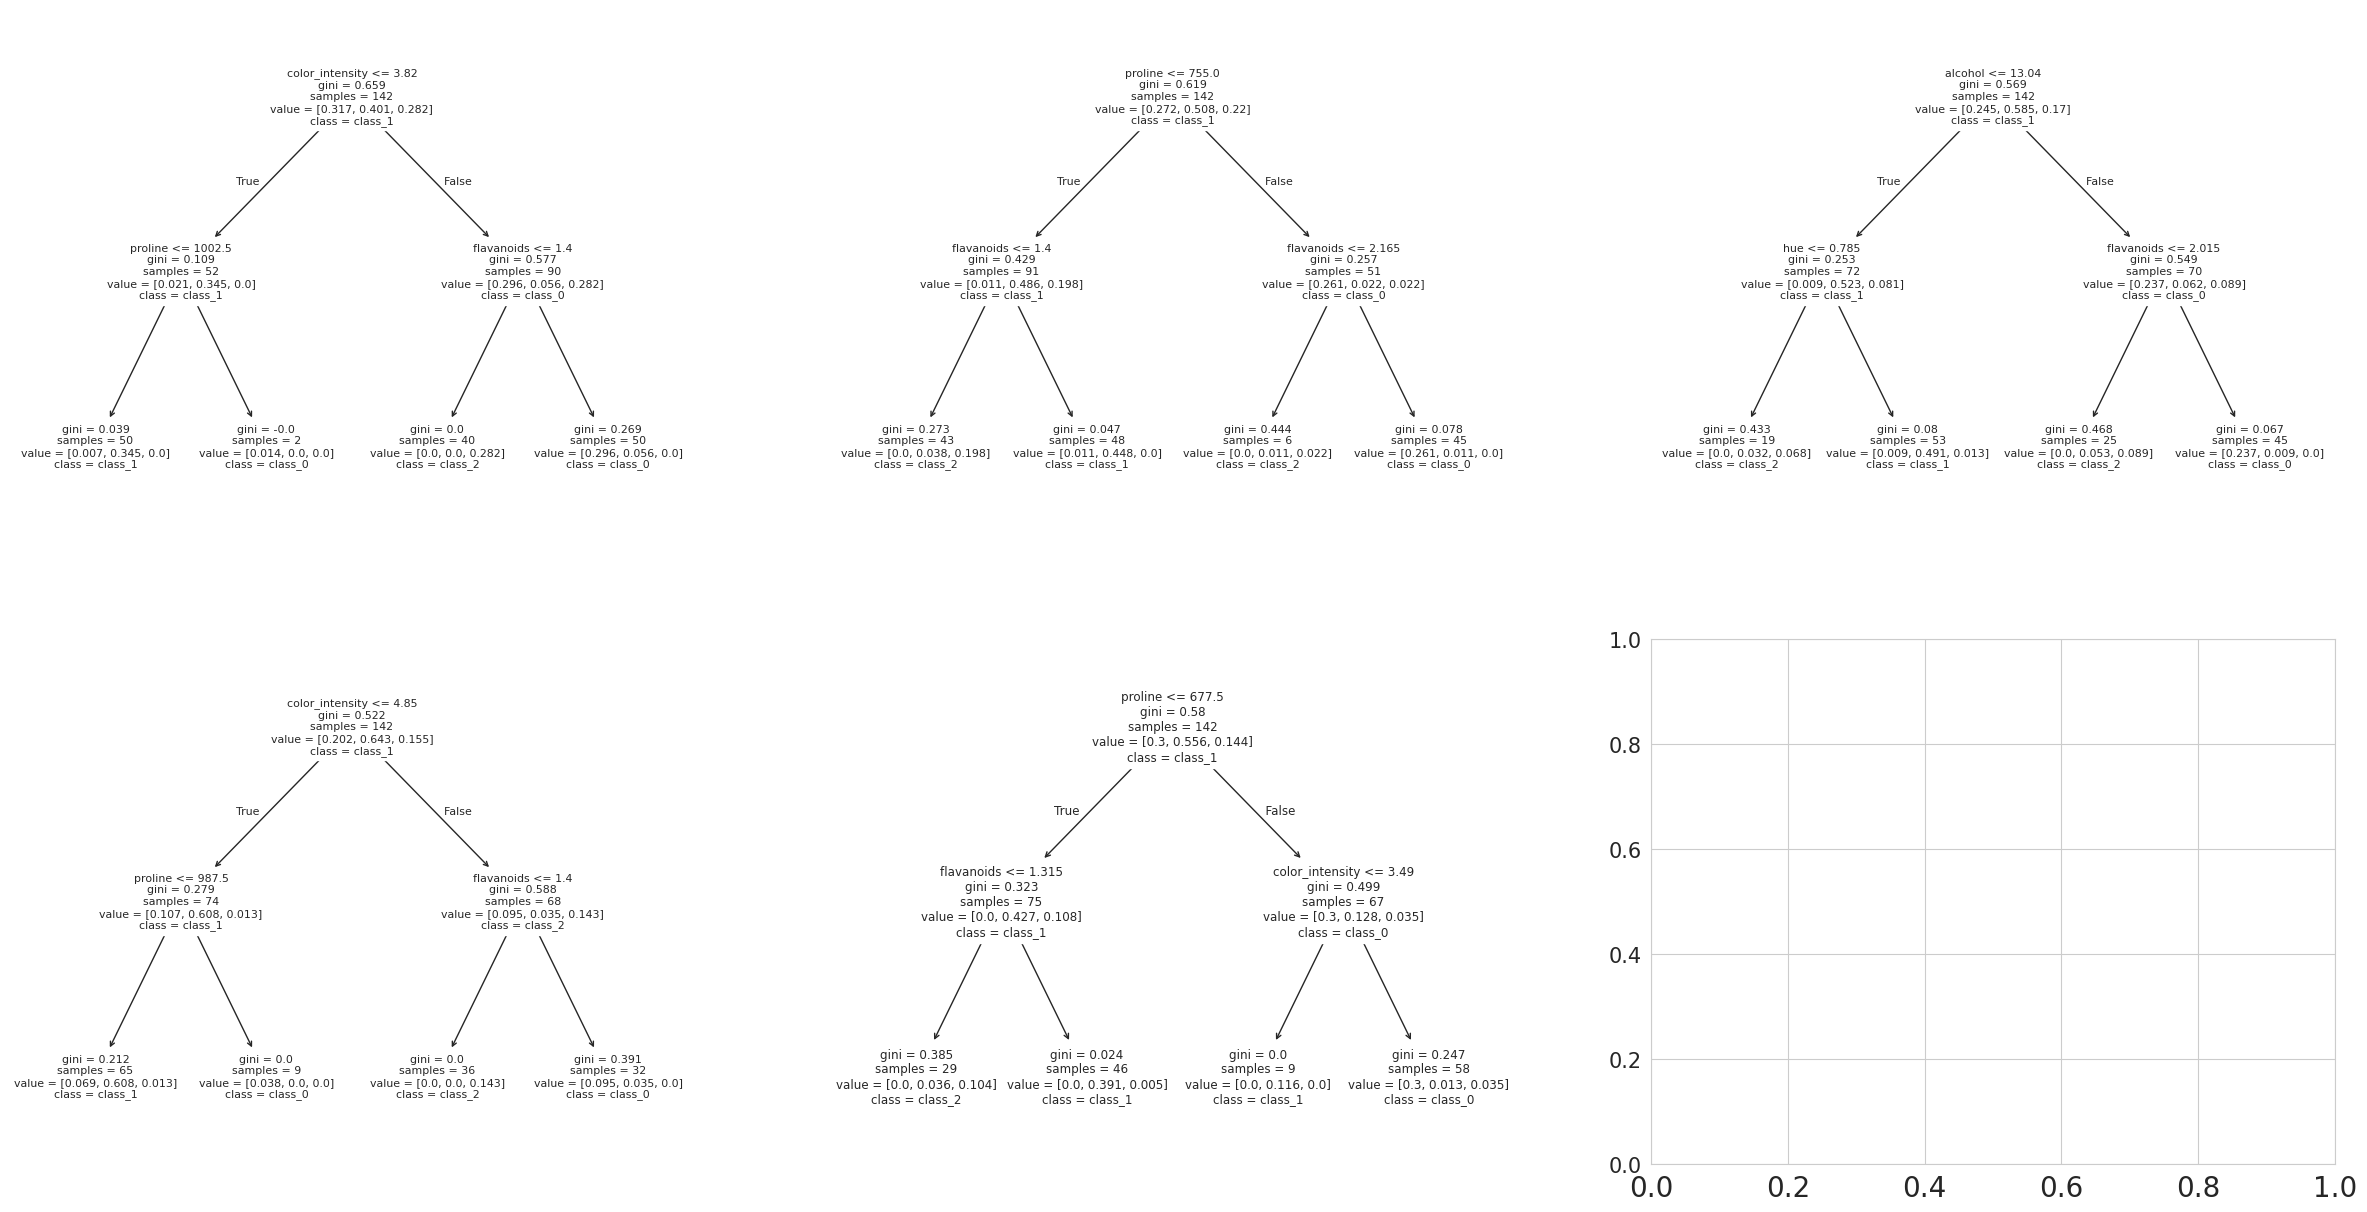

In [ ]:
# Examine decision tree
# This is a bit of a hack

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 15))

for ax, tree in zip(axes.flatten(), dtc_ada.estimators_):
    plot_tree(tree, feature_names=wine.feature_names, class_names=wine.target_names, ax=ax)

plt.show()

In [ ]:
# 5 minute exercise

# Try Adaboost with different n_estimators = 2, 4, 6, 8
# How does accuracy change?
# Which one would you choose?



In [ ]:
# 5 minute exercise

# Write a for loop over n_estimators
# What is the best value of n_estimator?


# Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

dtc_bag = BaggingClassifier(DecisionTreeClassifier(), n_estimators=6, max_samples=100, random_state=42) # normal to have 50+ estimators

dtc_bag.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=6, random_state=42)

In [ ]:
y_train_pred = dtc_bag.predict(X_train)
y_test_pred = dtc_bag.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print('Bagging. Accuracy - training set', round(accuracy_train, 2))
print('Bagging. Accuracy - testing set', round(accuracy_test, 2))

Bagging. Accuracy - training set 0.99
Bagging. Accuracy - testing set 0.97


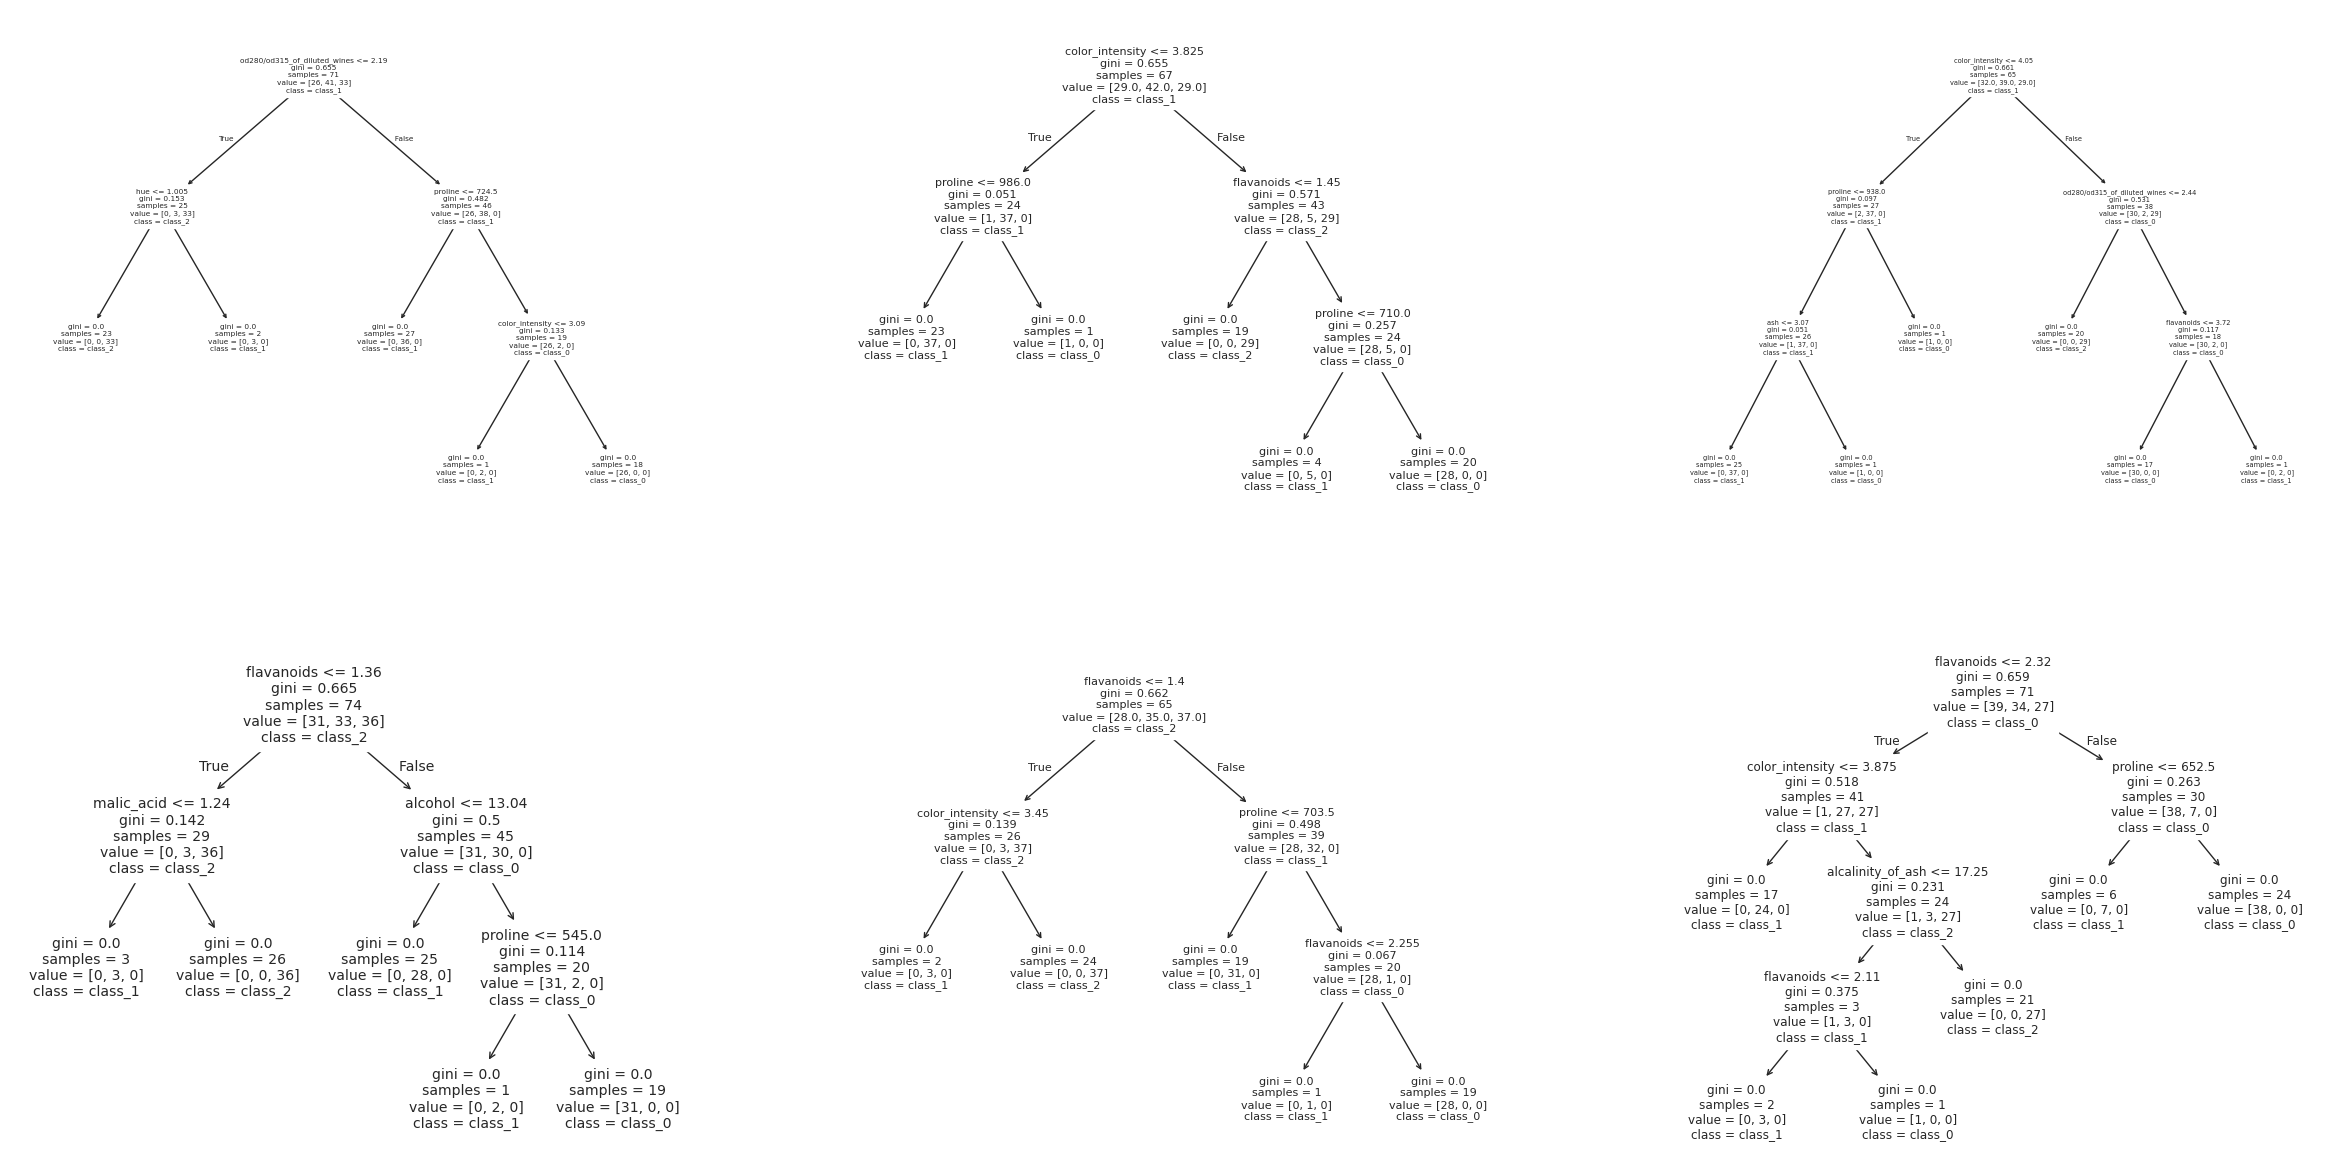

In [ ]:
# Examine decision tree

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 15))

for ax, tree in zip(axes.flatten(), dtc_bag.estimators_):
    plot_tree(tree, feature_names=wine.feature_names, class_names=wine.target_names, ax=ax)

plt.show()

In [ ]:
# 5 minute exercise

# What do you expect the result to be when:
# n_estimators = 1
# max_samples = 142



In [ ]:
from sklearn.ensemble import RandomForestClassifier

dtc_rnd = RandomForestClassifier(n_estimators=6, max_samples=100, random_state=42)

dtc_rnd.fit(X_train, y_train)

y_train_pred = dtc_rnd.predict(X_train)
y_test_pred = dtc_rnd.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print('RandomForest. Accuracy - training set', round(accuracy_train, 2))
print('RandomForest. Accuracy - testing set', round(accuracy_test, 2))

RandomForest. Accuracy - training set 0.99
RandomForest. Accuracy - testing set 0.92


# XGBoost


In [ ]:
import xgboost as xgb # eXtreme Gradient Boosting


xgb_clf = xgb.XGBClassifier()

xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.94


/usr/local/lib/python3.12/dist-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


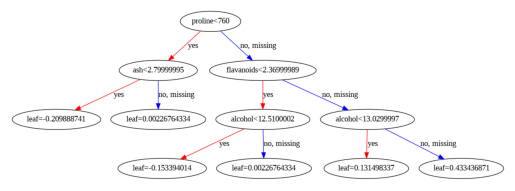

Number of trees used: 300


In [ ]:

xgb_clf.get_booster().feature_names = wine.feature_names

xgb.plot_tree(xgb_clf, num_trees=0)  # Plot the first tree
plt.show()

num_trees = len(xgb_clf.get_booster().get_dump())
print("Number of trees used:", num_trees)

# This is terrible! 300 trees and the same performance as the simple decision tree!


In [ ]:
# Try with 10 estimators

xgb_clf = xgb.XGBClassifier(n_estimators = 10)

xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97


# Regression Example: Linear Regression vs Simple Decision Tree vs XGBoost

In [ ]:

from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load data
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
print (diabetes.DESCR)


# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Create decision tree
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

# Create XGBoost
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# Make predictions
lr_predictions = lr.predict(X_test)
tree_predictions = tree_model.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)

# Compare using R2
lr_r2 = r2_score(y_test, lr_predictions)
tree_r2 = r2_score(y_test, tree_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

print("Linear regression R2:", lr_r2)
print("Decision Tree R2:", tree_r2)
print("XGBoost R2:", xgb_r2)


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee